In [32]:
import numpy as np
import matplotlib.pyplot as plt
from cic3d128 import CIC3D128
from seq_fir import FIR

In [2]:
fs = 122.88e6  # sampling frequency 122.88 MHz
ts = 1 / fs

In [65]:
freq =  200e3  # signal frequency
n_periods = 20  # number of periods to sample

signal = np.sin(2 * np.pi * freq * np.arange(0, n_periods * (1/freq), ts))

toUint16 = lambda x: np.uint16(np.int16(x * (2**15 - 1)))

data_valid = np.zeros_like(signal, dtype=bool)
data_signal = np.zeros_like(signal, dtype=np.uint64)

cic  = CIC3D128(exec_path="../../build/exec/cic3d128")
comp = FIR(exec_path="../../build/exec/cic3d128comp")

for i in range(len(signal)):
    valid, data = cic.forward(toUint16(signal[i])) 
    # convert 37 bit signal to 18 bits
    data = np.uint32((data >> 19) & 0x3FFFF)
    data_valid[i], data_signal[i] = comp.forward(valid, data)

cic.terminate()
comp.terminate()

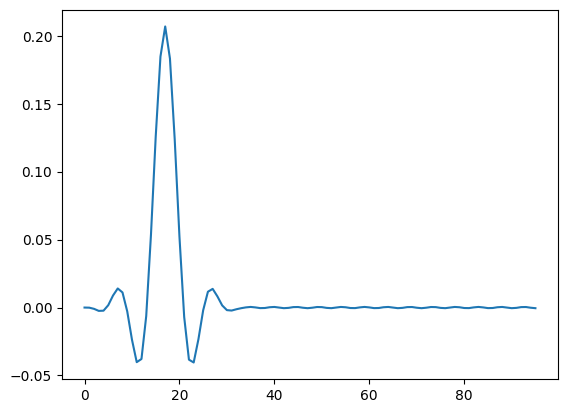

In [66]:
filtered_signal = data_signal[data_valid]

plt.plot(filtered_signal.astype(np.int64).astype(np.float64)[:] / (2**34 -1))

In [64]:
np.max(filtered_signal.astype(np.int64).astype(np.float64)[50:] / (2**34 -1))

np.float64(0.9594789877277495)